In [ ]:
import numpy as np
import time
import PIL.Image as Image
import matplotlib.pylab as plt
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub

In [ ]:
TF_MODEL_URL = 'https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_oceania_antarctica_V1/1'
LABEL_MAP_URL = 'https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_oceania_antarctica_V1_label_map.csv'
img_loc = "Image.jpg"
IMAGE_SHAPE = (321, 321)

In [ ]:
classifier = tf.keras.Sequential([
                                  hub.KerasLayer(TF_MODEL_URL,
                                                 input_shape=IMAGE_SHAPE+(3,),
                                                 output_key="predictions:logits")])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
df = pd.read_csv(LABEL_MAP_URL)

In [ ]:
df.head()

,id,name
0,0,Sydney Cove
1,1,Brisbane River
2,2,Perth Arena
3,3,Grampians National Park
4,4,ChristChurch Cathedral


In [ ]:
label_map = dict(zip(df.id, df.name))

In [ ]:
img = Image.open(img_loc).resize(IMAGE_SHAPE)

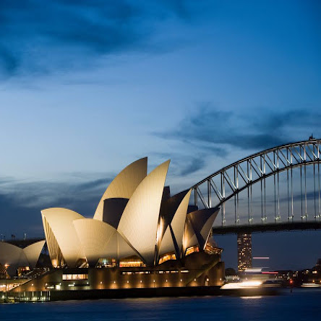

In [ ]:
img

In [ ]:
img = np.array(img)/255.0
img = img[np.newaxis, ...]

In [ ]:
result = classifier.predict(img)

In [ ]:
label_map[1]

'Brisbane River'

In [ ]:
label_map[np.argmax(result)]

'Sydney Opera House'